# Final Exam Take Home Portion - Template

### 1. Create feature matrix and response matrix

In [151]:
import pandas as pd
import numpy as np

class_info = pd.read_csv('class.csv')              # class infomation dataset
zoo_dataset = pd.read_csv('zoo.csv')               # load dataset

In [152]:
zoo_dataset

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [153]:
class_info

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


### create feature matrix $X$ and response matrix $Y$

In [154]:
Y = zoo_dataset[['class_type']]
X = zoo_dataset.drop(columns=['class_type','animal_name']) 

In [155]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [156]:
Y

,class_type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


### 2. Plot dendrogram and analyze clusters (25pts)

In [157]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, linkage, thresh):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count      
    
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)  # linkage matrix
    
    # generate figure
    plt.figure(figsize=(30,20))
    plt.title(linkage+' Linkage Dendrogram', fontsize=30)
    dendrogram(linkage_matrix)                                                                  # plot the dendrogram
    plt.axhline(y=thresh, color= 'k', linestyle='--', linewidth=3, label='Distance Threshold')
    plt.xlabel("Sample index", fontsize=25)
    plt.ylabel("Euclidean distance", fontsize=25)
    plt.legend(fontsize = 20)
    plt.tick_params(labelsize=16)
    plt.show()

### Plot Average Linkage Dendrogram

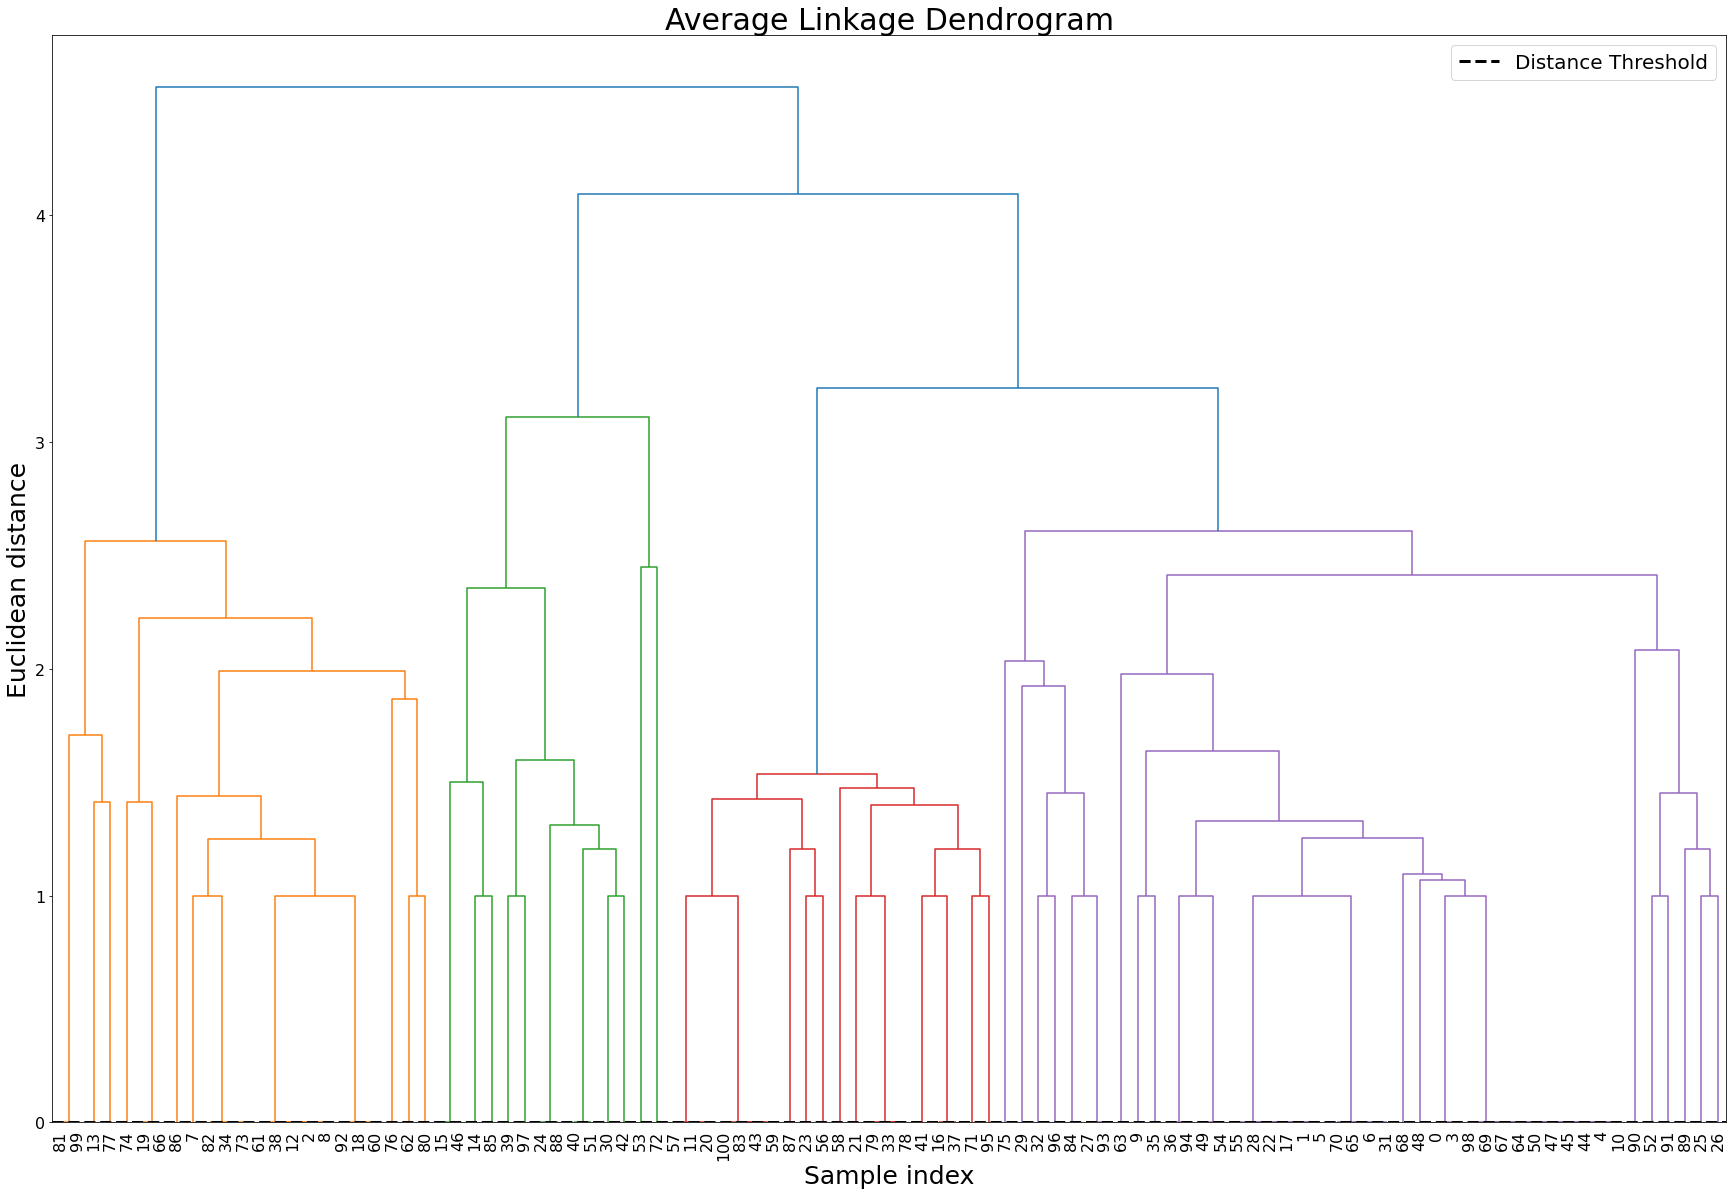

In [158]:
linkage = 'Average'
thresh = 0
# todo - set thresh value to cut 7 clusters (This can be trial and error)
#thresh  = ???? 
# setting distance_threshold ensures we have 7 clusters (the horizontal threshold line should cut 7 vertical lines)

average_model = AgglomerativeClustering(linkage=linkage.lower(), distance_threshold=thresh, n_clusters=None)
average_model.fit(X)
plot_dendrogram(average_model, linkage, thresh)

### Clusters vs. Labels

Generate plots to show the performance of Average linkage model a clustering classes. 

In [159]:
def plot_cluster(cluster, model):
    idx = model.labels_ == cluster
    true_label_distribution = Y['class_type'][idx]

    axes.flatten()[cluster].hist(true_label_distribution, bins=np.arange(0.5, 8.5))
    axes.flatten()[cluster].set_xticks(range(1,8))
    axes.flatten()[cluster].set_xticklabels(class_info['Class_Type'].tolist(), fontsize=16, color='orange', rotation=40, 
                                               fontweight='bold',horizontalalignment='right')
    axes.flatten()[cluster].set_title("Cluster "+str(cluster+1), fontsize=20)
    plt.setp(axes.flatten()[cluster].get_yticklabels(), fontsize=16)

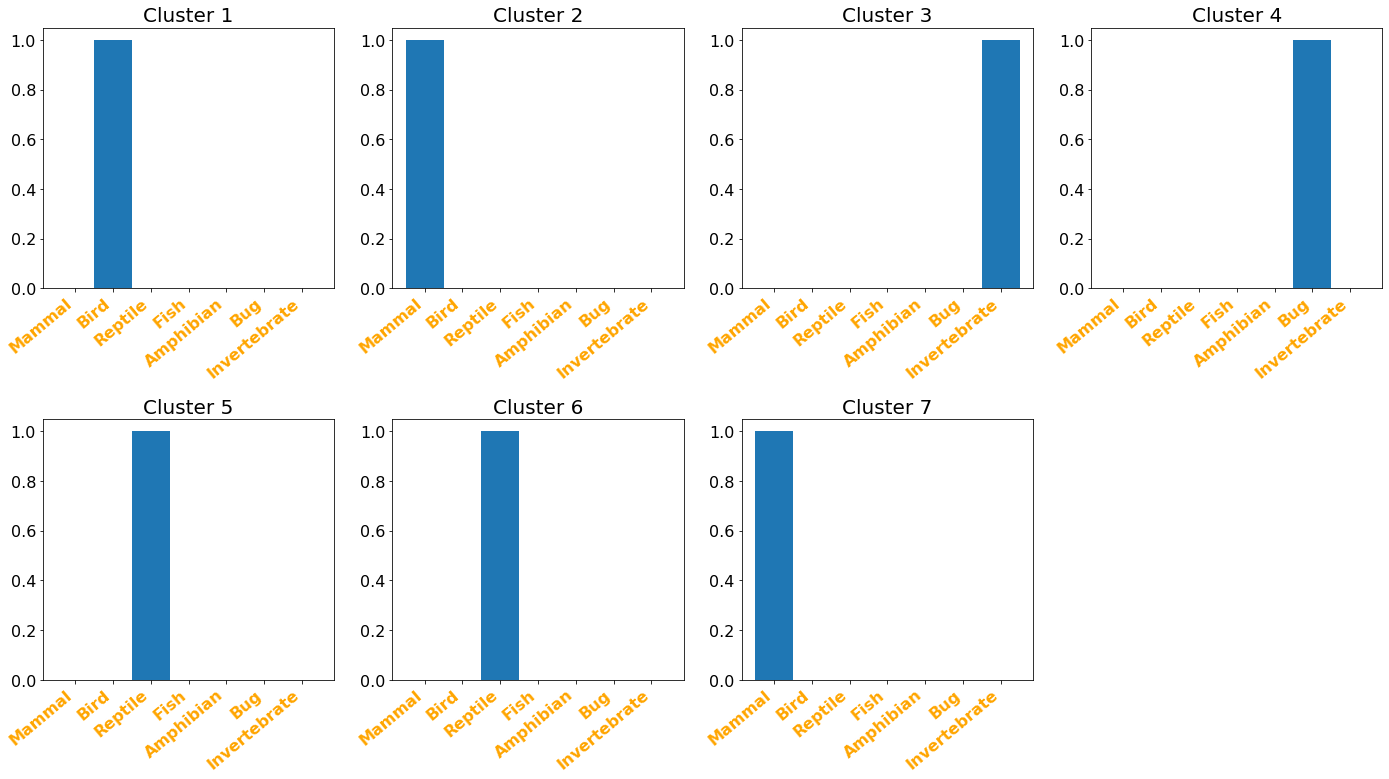

In [160]:
n_clusters = 7
fig, axes =  plt.subplots(nrows=2, ncols=4,figsize=(24,12))
for cluster in range(n_clusters):
    plot_cluster(cluster, average_model)
fig.delaxes(axes.flatten()[cluster+1])
fig.subplots_adjust(hspace=.5)

Comment on how the natural clusters from heirarchical clustering relate to the actual classes?

### 3. Supervised Learning Model To Predict Animal Class Given Features (5pts each for 25 pts)

In [161]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(zoo_dataset, shuffle=True, train_size=0.5, random_state=0)  # random split of 50%

Ytrain = train['class_type']                                  # training labels
Xtrain = train.drop(columns=['class_type','animal_name'])     # training features

Ytest = test['class_type']                                    # testing lables
Xtest = test.drop(columns=['class_type','animal_name'])       # testing features

#### a. Random Forest: Implement Default Model and determine performance

In [162]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a random forest classifier
rf = RandomForestClassifier(random_state=0, )
rf.fit(Xtrain, Ytrain)
# todo determine the accuracy on the test data set.



RandomForestClassifier(random_state=0)

#### b. Random Forest: Implement Default Model and determine performance

In [163]:
# Create an additional random forect classifier using entropy as criterion
# todo = train classifier rfe with splitting criteria entropy instead of gini index.
# Explain how entropy and gini index are different/similar
rfe.fit(Xtrain, Ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=199, random_state=0)

In [164]:
# todo determine the accuracy on the test data set.  How does the entropy classifier compare to the gini classifier


In [165]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


### c. Plot one of the trees from the Gini and Entropy forests

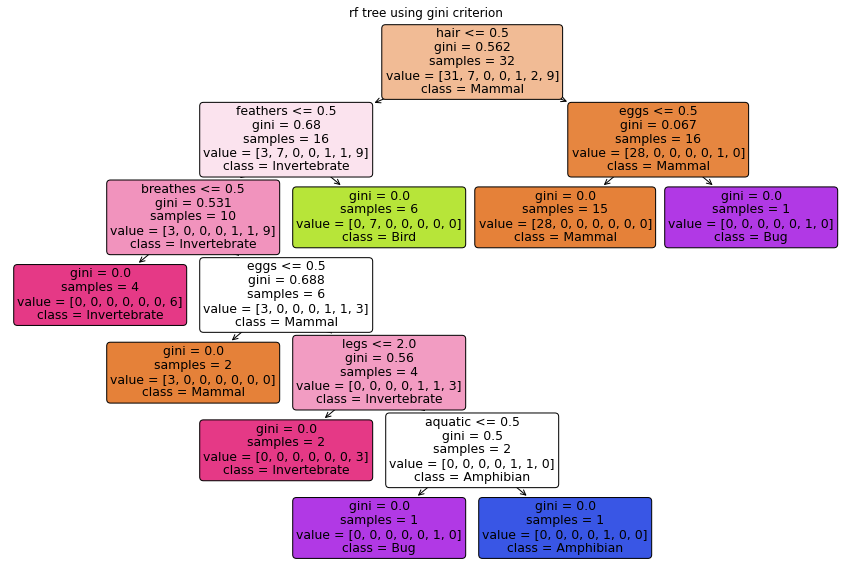

In [166]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          feature_names=X.columns,
          class_names=class_info['Class_Type'], 
          filled=True, rounded=True)
plt.title('rf tree using gini criterion')
plt.show()
# todo - plot rf tree using entropy criterion

### d. Determine number of trees required
#### vary the number of trees in the forest to see the minimum number of trees required to get optimal training error.

In [146]:
rf_accuracy = np.zeros((200,1))
rf_mse = np.zeros((200,1))
rfe_mse = np.zeros((200,1))
for i in range(1,200):
    rf = RandomForestClassifier(random_state=0, n_estimators=i)
    rf.fit(Xtrain, Ytrain)
    rfe = RandomForestClassifier(random_state=0, n_estimators=i, criterion='entropy')
    rfe.fit(Xtrain, Ytrain)
  #  print('Percentage of correct classifications using Random Forest = '+str(accuracy_score(Ytest, rf.predict(Xtest))))
    print(i)
    rfe_mse[i] = np.mean((Ytest - rfe.predict(Xtest))**2)
    rf_mse[i] = np.mean((Ytest - rf.predict(Xtest))**2)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


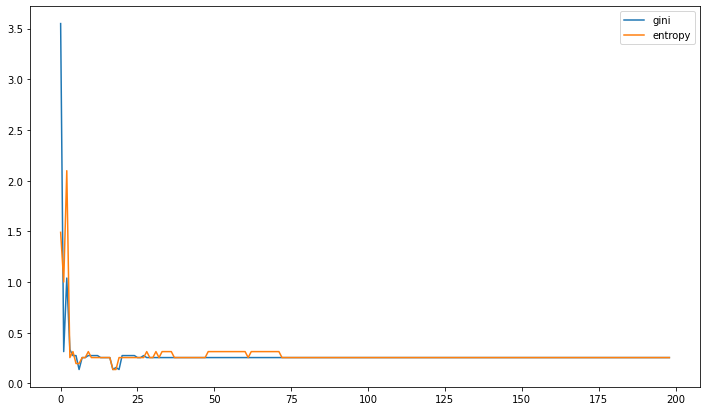

In [112]:
#  Plot mse vs number of trees for both gini and entropy classifiers
plt.figure(figsize=(12,7))
plt.plot(rf_mse[1:], label='gini')
plt.plot(rfe_mse[1:], label = 'entropy')
plt.legend()
# comment on any differences in performance

#### e. Feature Importance

In [123]:
# The following function can be used to plot feature importances
def plot_feature_importance(model):
    importance = model.feature_importances_  # feature importance 
    features = X.columns                     # feature names
    indices = np.argsort(importance)         # feature ranking

    plt.figure(figsize=(10,7))
    plt.title('Feature Importance',fontsize =22)
    plt.barh(range(len(indices)), importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance',fontsize =18)
    plt.tick_params(labelsize=16)
    plt.show()

In [126]:
## todo plot feature imporance for both the gini and entropy based random forest classifiers
# Comment on top 3 features for each classifier]
# How does random forest determine feature importance

### 4. Additional Random Forst Hyperparameter optimization (20pts)

In [149]:
# Todo - select a second hyperparamter for random forest to tune, such as: 
# 'max_features'
# 'max_leaf_nodes': None,
# 'max_samples': None,
# 'min_samples_leaf'
# 'min_samples_split'
# Describe what this parameter does and why you selected it as a means of potentially improving performance
# determine the accuracy of your classifier after tuning this parameter and any changes in feature importance

### 5.  Additional Classfier (10pts)

In [150]:
# Todo - select another classification method we have studied: 
# for example SVM, Logistic Regression, KNN, MLP, NN, A Kernel Method, or Adaboost
# Fit a model using default parameters and compare to your best Random Forest model

### 6.  Additional Classifier Tuning (20pts)

In [ ]:
# Todo - select at least one hyperparameter for your selected classifier, explain what it does, and optimize it
# showing at least one figure depicting the effect of the hyperparameter on performance
# How does your optimized classifier compare with default and with randome forest performance?